In [2]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

We will download flowers dataset from google website and store it locally. In below call it downloads the zip file (.tgz) in cache_dir which is . meaning the current folder

In [12]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='.', untar=True)
# cache_dir indicates where to download data. I specified . which means current directory
# untar true will unzip it

228813984/228813984 [==============================] - 57s 0us/step


In [14]:
data_dir

'.\\datasets\\flower_photos'

In [16]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

WindowsPath('datasets/flower_photos')

In [20]:
list(data_dir.glob('*/*.jpg'))

[WindowsPath('datasets/flower_photos/daisy/100080576_f52e8ee070_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10140303196_b88d3d6cec.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172379554_b296050f82_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172567486_2748826a8b.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172636503_21bededa75_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/102841525_bd6628ae3c.jpg'),
 WindowsPath('datasets/flower_photos/daisy/1031799732_e7f4008c03.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10391248763_1d16681106_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10437754174_22ec990b77_m.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10437770546_8bb6f7bdd3_m.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10437929963_bc13eebe0c.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10466290366_cc72e33532.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10466558316_a7198b87e2.jpg'),
 WindowsPath('datasets/flower_photos/daisy/1

In [22]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3670


In [26]:
roses = list(data_dir.glob('roses/*'))
roses[:5]

[WindowsPath('datasets/flower_photos/roses/10090824183_d02c613f10_m.jpg'),
 WindowsPath('datasets/flower_photos/roses/102501987_3cdb8e5394_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/10503217854_e66a804309.jpg'),
 WindowsPath('datasets/flower_photos/roses/10894627425_ec76bbc757_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/110472418_87b6a3aa98_m.jpg')]

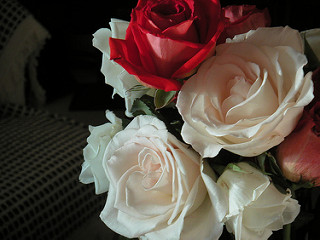

In [28]:
PIL.Image.open(str(roses[1]))

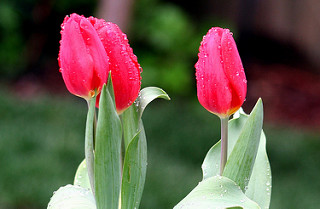

In [30]:
tulips = list(data_dir.glob('tulips/*'))
PIL.Image.open(str(tulips[0]))

In [32]:
flowers_images_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*')),
}

In [34]:
flowers_images_dict['roses']

[WindowsPath('datasets/flower_photos/roses/10090824183_d02c613f10_m.jpg'),
 WindowsPath('datasets/flower_photos/roses/102501987_3cdb8e5394_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/10503217854_e66a804309.jpg'),
 WindowsPath('datasets/flower_photos/roses/10894627425_ec76bbc757_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/110472418_87b6a3aa98_m.jpg'),
 WindowsPath('datasets/flower_photos/roses/11102341464_508d558dfc_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/11233672494_d8bf0a3dbf_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/11694025703_9a906fedc1_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/118974357_0faa23cce9_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/11944957684_2cc806276e.jpg'),
 WindowsPath('datasets/flower_photos/roses/12045735155_42547ce4e9_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/12165480946_c4a3fe182d_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/12202373204_34fb07205b.jpg'),
 WindowsPath('datasets/flower_photos/

In [52]:
## Assignning Class Number Randomly
flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}

In [54]:
flowers_images_dict['roses'][:5]

[WindowsPath('datasets/flower_photos/roses/10090824183_d02c613f10_m.jpg'),
 WindowsPath('datasets/flower_photos/roses/102501987_3cdb8e5394_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/10503217854_e66a804309.jpg'),
 WindowsPath('datasets/flower_photos/roses/10894627425_ec76bbc757_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/110472418_87b6a3aa98_m.jpg')]

In [56]:
str(flowers_images_dict['roses'][0])

'datasets\\flower_photos\\roses\\10090824183_d02c613f10_m.jpg'

In [129]:
img = cv2.imread(str(flowers_images_dict['roses'][0]))

In [60]:
img.shape

(240, 179, 3)

In [62]:
cv2.resize(img,(180,180)).shape

(180, 180, 3)

In [64]:
X, y = [], []

for flower_name, images in flowers_images_dict.items():
    print(flower_name)
    print(len(images))

roses
641
daisy
633
dandelion
898
sunflowers
699
tulips
799


In [66]:
X, y = [], []

for flower_name, images in flowers_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(180,180))
        X.append(resized_img)
        y.append(flowers_labels_dict[flower_name])## y tey oi cls lebel ta assign krtesi

In [67]:
y[:5]

[0, 0, 0, 0, 0]

In [70]:
# just converting into simple numpy array
X = np.array(X)
y = np.array(y)

# Train test split

In [73]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Preprocessing: scale images

In [76]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

# Build convolutional neural network and train it

In [79]:
num_classes = 5

model = Sequential([
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
model.fit(X_train_scaled, y_train, epochs=30)  

Epoch 1/30
86/86 [==============================] - 54s 565ms/step - loss: 1.3442 - accuracy: 0.4259
Epoch 2/30
86/86 [==============================] - 48s 559ms/step - loss: 1.0264 - accuracy: 0.5930
Epoch 3/30
86/86 [==============================] - 48s 561ms/step - loss: 0.8352 - accuracy: 0.6842
Epoch 4/30
86/86 [==============================] - 49s 573ms/step - loss: 0.6129 - accuracy: 0.7754
Epoch 5/30
86/86 [==============================] - 48s 558ms/step - loss: 0.3954 - accuracy: 0.8630
Epoch 6/30
86/86 [==============================] - 49s 565ms/step - loss: 0.2310 - accuracy: 0.9266
Epoch 7/30
86/86 [==============================] - 49s 567ms/step - loss: 0.1229 - accuracy: 0.9680
Epoch 8/30
86/86 [==============================] - 48s 556ms/step - loss: 0.0684 - accuracy: 0.9866
Epoch 9/30
86/86 [==============================] - 49s 571ms/step - loss: 0.0416 - accuracy: 0.9887
Epoch 10/30
86/86 [==============================] - 40s 462ms/step - loss: 0.0246 - accura

In [80]:
model.evaluate(X_test_scaled,y_test)

29/29 [==============================] - 3s 71ms/step - loss: 2.2193 - accuracy: 0.6688


[2.2192845344543457, 0.6688452959060669]

Here we see that while train accuracy is very high (99%), the test accuracy is significantly low (66.99%) indicating overfitting. Let's make some predictions before we use data augmentation to address overfitting

# in more organized way

In [85]:
#Define Model
num_classes = 5

model = Sequential([
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes)
])

model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)


In [87]:
# Train the model and store the history
history = model.fit(X_train_scaled, y_train, epochs=30, validation_data=(X_test_scaled, y_test))


Epoch 1/30
86/86 [==============================] - 33s 365ms/step - loss: 1.3899 - accuracy: 0.3986 - val_loss: 1.1385 - val_accuracy: 0.5381
Epoch 2/30
86/86 [==============================] - 32s 370ms/step - loss: 1.0575 - accuracy: 0.5701 - val_loss: 1.0178 - val_accuracy: 0.5828
Epoch 3/30
86/86 [==============================] - 30s 343ms/step - loss: 0.8826 - accuracy: 0.6690 - val_loss: 0.9552 - val_accuracy: 0.6427
Epoch 4/30
86/86 [==============================] - 29s 340ms/step - loss: 0.6959 - accuracy: 0.7391 - val_loss: 0.9588 - val_accuracy: 0.6438
Epoch 5/30
86/86 [==============================] - 32s 377ms/step - loss: 0.4609 - accuracy: 0.8318 - val_loss: 1.0250 - val_accuracy: 0.6492
Epoch 6/30
86/86 [==============================] - 31s 366ms/step - loss: 0.2821 - accuracy: 0.9037 - val_loss: 1.4187 - val_accuracy: 0.6198
Epoch 7/30
86/86 [==============================] - 29s 341ms/step - loss: 0.1847 - accuracy: 0.9448 - val_loss: 1.4098 - val_accuracy: 0.6503

In [88]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test)
print(f"Test Loss: {test_loss}, Test Accuracy: {test_accuracy}")


29/29 [==============================] - 2s 84ms/step - loss: 2.7147 - accuracy: 0.6373
Test Loss: 2.7147083282470703, Test Accuracy: 0.6372548937797546


In [89]:
# Function to plot training and validation metrics
def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    
    epochs = range(1, len(acc) + 1)
    
    # Plot accuracy
    plt.figure(figsize=(14, 5))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, label='Training Accuracy')
    plt.plot(epochs, val_acc, label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    
    # Plot loss
    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, label='Training Loss')
    plt.plot(epochs, val_loss, label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    
    plt.show()


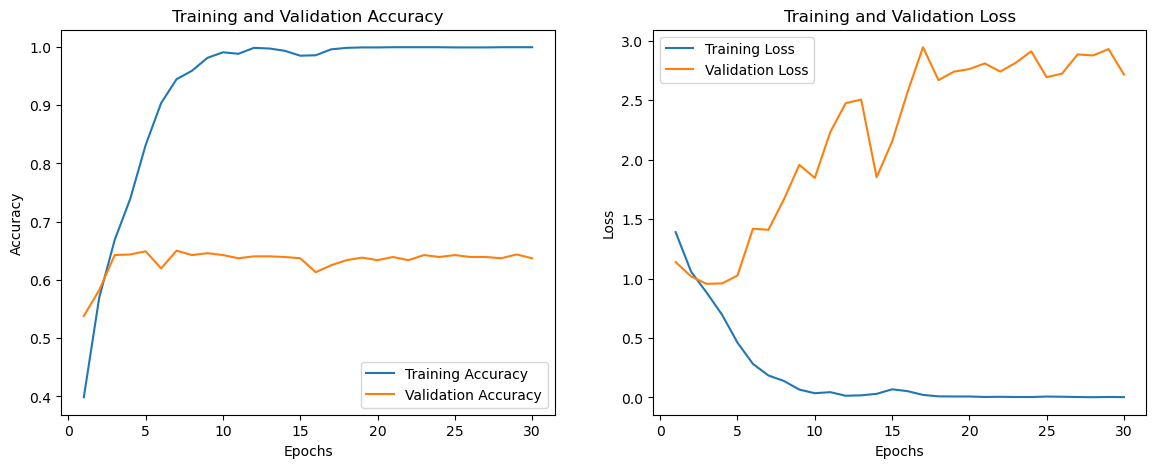

In [90]:
# Call the plotting function
plot_history(history)

Here we see that while train accuracy is very high (99%), the test accuracy is significantly low (66.99%) indicating overfitting. Let's make some predictions before we use data augmentation to address overfitting

In [96]:
predictions = model.predict(X_test_scaled)
predictions

29/29 [==============================] - 3s 79ms/step


array([[  1.8046426,  16.133123 ,  -9.005868 , -21.234625 ,  -3.931058 ],
       [  7.448196 ,   2.082625 ,  -7.9847355,  -8.017789 ,  -2.525243 ],
       [ -1.1981821,   6.2323775,  12.86917  ,  -9.784694 ,  -5.5253034],
       ...,
       [  6.2078714,   3.2169952,  -4.583754 ,  10.535533 ,   4.161999 ],
       [  1.0256612,   4.1845465,  -6.1321974,  -4.6116505,  -7.994563 ],
       [  7.901207 ,  -8.335423 ,   2.402536 ,  12.555867 ,   8.60023  ]],
      dtype=float32)

In [102]:
np.argmax([2,8,7])

1

In [110]:
score = tf.nn.softmax(predictions[0]) ##converting set of function into probability array
score

<tf.Tensor: shape=(5,), dtype=float32, numpy=
array([5.9871434e-07, 9.9999940e-01, 1.2085764e-11, 5.9073527e-17,
       1.9330189e-09], dtype=float32)>

In [112]:
np.argmax(score)

1

In [114]:
y_test[0]

1

# Improve Test Accuracy Using Data Augmentation

In [133]:
data_augmentation = keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(180, 
                                                              180,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1)
  ])


# Original Image

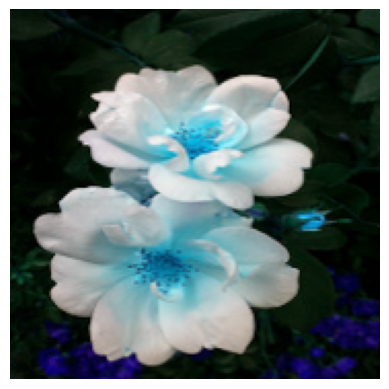

In [136]:
plt.axis('off')
plt.imshow(X[0])

# Newly generated training sample using data augmentation

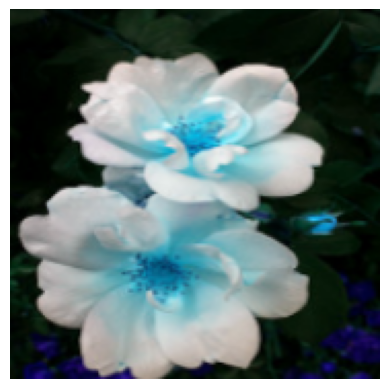

In [123]:
plt.axis('off')
plt.imshow(data_augmentation(X)[0].numpy().astype("uint8"))

# Train the model using data augmentation and a drop out layer

In [140]:
num_classes = 5

model = Sequential([
  data_augmentation,################
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),################
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              


In [151]:
history = model.fit(X_train_scaled, y_train, epochs=30, validation_data=(X_test_scaled, y_test))    

Epoch 1/30
86/86 [==============================] - 35s 402ms/step - loss: 0.3277 - accuracy: 0.8735 - val_loss: 0.8657 - val_accuracy: 0.7538
Epoch 2/30
86/86 [==============================] - 32s 369ms/step - loss: 0.3219 - accuracy: 0.8844 - val_loss: 0.8123 - val_accuracy: 0.7484
Epoch 3/30
86/86 [==============================] - 32s 376ms/step - loss: 0.3247 - accuracy: 0.8783 - val_loss: 0.9611 - val_accuracy: 0.7266
Epoch 4/30
86/86 [==============================] - 33s 388ms/step - loss: 0.2987 - accuracy: 0.8881 - val_loss: 0.8850 - val_accuracy: 0.7418
Epoch 5/30
86/86 [==============================] - 32s 370ms/step - loss: 0.2799 - accuracy: 0.8997 - val_loss: 0.9926 - val_accuracy: 0.7277
Epoch 6/30
86/86 [==============================] - 31s 365ms/step - loss: 0.2994 - accuracy: 0.8866 - val_loss: 0.9507 - val_accuracy: 0.7309
Epoch 7/30
86/86 [==============================] - 31s 364ms/step - loss: 0.2847 - accuracy: 0.8924 - val_loss: 0.8988 - val_accuracy: 0.7342

In [152]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test)
print(f"Test Loss: {test_loss}, Test Accuracy: {test_accuracy}")

29/29 [==============================] - 2s 71ms/step - loss: 1.1757 - accuracy: 0.7538
Test Loss: 1.175666332244873, Test Accuracy: 0.7538126111030579


In [153]:
# Function to plot training and validation metrics
def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    
    epochs = range(1, len(acc) + 1)
    
    # Plot accuracy
    plt.figure(figsize=(14, 5))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, label='Training Accuracy')
    plt.plot(epochs, val_acc, label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    
    # Plot loss
    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, label='Training Loss')
    plt.plot(epochs, val_loss, label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    
    plt.show()


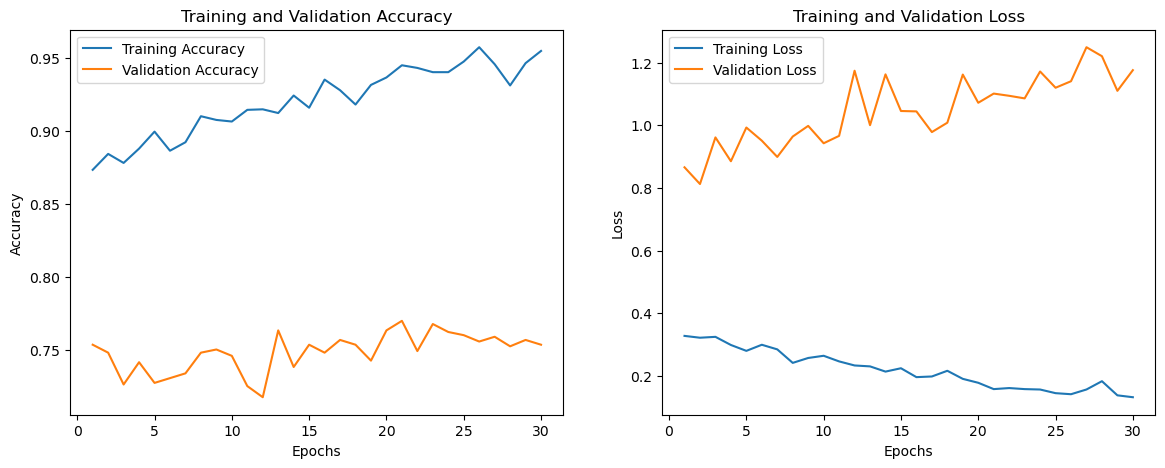

In [154]:
# Call the plotting function
plot_history(history)

You can see that by using data augmentation and drop out layer the accuracy of test set predictions is increased to 73.74%

# Data augmentation using keras

In [ ]:
## for single img

In [39]:
'''
Image shifts via the width_shift_range and height_shift_range arguments.
Image flips via the horizontal_flip and vertical_flip arguments.
Image rotations via the rotation_range argument
Image brightness via the brightness_range argument.
Image zoom via the zoom_range argument.'''

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from skimage import io


In [45]:
# Construct an instance of the ImageDataGenerator class
# Pass the augmentation parameters through the constructor. 

datagen = ImageDataGenerator(
        rotation_range=45,     #Random rotation between 0 and 45
        width_shift_range=0.2,   #% shift
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='constant', cval=125) #cval=125 grey   #Also try nearest, constant, reflect, wrap
   #fill_mode='nearest' is the default

In [55]:
# Loading a sample image  
#Can use any library to read images but they need to be in an array form
#If using keras load_img convert it to an array first
x = io.imread(r'C:\Users\ASUS\DL practice\Monalisa\img\mona.png')  #Array with shape (256, 256, 3)

# Reshape the input image because ...
#x: Input data to datagen.flow must be Numpy array of rank 4 or a tuple.
#First element represents the number of images
x = x.reshape((1, ) + x.shape)  #Array with shape (1, 256, 256, 3)

i = 0
for batch in datagen.flow(x, batch_size=16,  # .flow for single image and x is the numpy array
                          save_to_dir=r'C:\Users\ASUS\DL practice\Monalisa\augmented', 
                          save_prefix='aug', 
                          save_format='png'):
    i += 1
    if i > 20:
        break  # otherwise the generator would loop indefinitely  


####################################################################

In [ ]:
## for multiple image

In [61]:
#Multiple images.
#Manually read each image and create an array to be supplied to datagen via flow method
dataset = []

import numpy as np
from skimage import io
import os
from PIL import Image

image_directory = r'C:\Users\ASUS\DL practice\Monalisa\more\\'  # Ensure the path ends with a separator
SIZE = 128
dataset = []

my_images = os.listdir(image_directory)
for i, image_name in enumerate(my_images):
    if (image_name.split('.')[1] == 'png'):
        image = io.imread(image_directory + image_name)
        image = Image.fromarray(image, 'RGB')
        image = image.resize((SIZE,SIZE))########################
        dataset.append(np.array(image))

x = np.array(dataset)

#Let us save images to get a feel for the augmented images.
#Create an iterator either by using image dataset in memory (using flow() function)
#or by using image dataset from a directory (using flow_from_directory)
#from directory can beuseful if subdirectories are organized by class
   
# Generating and saving 10 augmented samples  
# using the above defined parameters.  
#Again, flow generates batches of randomly augmented images
  
i = 0
for batch in datagen.flow(x, batch_size=16,  
                          save_to_dir=r'C:\Users\ASUS\DL practice\Monalisa\aug_more', 
                          save_prefix='aug', 
                          save_format='png'):
    i += 1
    if i > 20:
        break  # otherwise the generator would loop indefinitely  





In [ ]:
## Multiclass Image

In [67]:
# Construct an instance of the ImageDataGenerator class
# Pass the augmentation parameters through the constructor. 

datagen = ImageDataGenerator(
        rotation_range=45,     #Random rotation between 0 and 45
        width_shift_range=0.2,   #% shift
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='reflect', cval=125) #cval=125 grey   #Also try nearest, constant, reflect, wrap
   #fill_mode='nearest' is the default

In [69]:
#Multiclass. Read dirctly from the folder structure using flow_from_directory
#Multiclass. Read dirctly from the folder structure using flow_from_directory

i = 0
for batch in datagen.flow_from_directory(directory=r'C:\Users\ASUS\DL practice\Monalisa\multi-class', 
                                         batch_size=16,  
                                         target_size=(256, 256),
                                         color_mode="rgb",
                                         save_to_dir=r'C:\Users\ASUS\DL practice\Monalisa\augmented1', 
                                         save_prefix='aug', 
                                         save_format='png'):
    i += 1
    if i > 31:
        break 

Found 119 images belonging to 2 classes.


# Malarial cell classification using CNN

In [28]:
import numpy as np
import os
#Set the `numpy` pseudo-random generator at a fixed value
#This helps with repeatable results everytime you run the code. 
np.random.seed(1000)

import matplotlib.pyplot as plt
import os
import cv2
from PIL import Image ##Pillow teke image.resie ta use korbo
import keras

In [29]:
os.environ['KERAS_BACKEND'] = 'tensorflow' # Added to set the backend as Tensorflow
#We can also set it to Theano if we want. 

In [31]:
#Iterate through all images in Parasitized folder, resize to 64 x 64
#Then save as numpy array with name 'dataset'
#Set the label to this as 0

# Specify the directory containing the images
image_directory = r'C:\Users\ASUS\DL practice\cell_images'
SIZE = 64
dataset = []  #Many ways to handle data, you can use pandas. Here, we are using a list format.  
label = []  #Place holders to define add labels. We will add 0 to all parasitized images and 1 to uninfected.

In [32]:
# Loop through all images in the 'Parasitized' folder
parasitized_images = os.listdir(os.path.join(image_directory, 'Parasitized'))  # Use os.path.join for robustness
for i, image_name in enumerate(parasitized_images):
    # Process only PNG files
    if image_name.endswith('.png'):  # Safely check for the '.png' extension
        # Construct the full image path
        image_path = os.path.join(image_directory, 'Parasitized', image_name)
        
        # Read the image using OpenCV
        image = cv2.imread(image_path)
        
        # Convert the image from BGR (OpenCV default) to RGB format
        image = Image.fromarray(image, 'RGB')  
        
        # Resize the image to the desired size
        image = image.resize((SIZE, SIZE))
        
        # Add the image data to the dataset
        dataset.append(np.array(image))
        
        # Add the label (0 = Parasitized)
        label.append(0)

KeyboardInterrupt: 

In [ ]:
# Iterate through all images in the 'Uninfected' folder, resize to 64 x 64,
# and save them into the same numpy array 'dataset' with label 1.

# Define the directory for Uninfected images
uninfected_images = os.listdir(os.path.join(image_directory, 'Uninfected'))  # Use os.path.join for robust path construction

for i, image_name in enumerate(uninfected_images):
    # Check if the file has a '.png' extension
    if image_name.endswith('.png'):
        # Construct the full path to the image
        image_path = os.path.join(image_directory, 'Uninfected', image_name)
        
        # Read the image using OpenCV
        image = cv2.imread(image_path)
        
        # Convert the image from BGR (OpenCV default) to RGB
        image = Image.fromarray(image, 'RGB')
        
        # Resize the image to the desired size (64x64)
        image = image.resize((SIZE, SIZE))
        
        # Append the processed image array to the dataset
        dataset.append(np.array(image))
        
        # Append the label (1 = Uninfected) to the label list
        label.append(1)


In [ ]:
#Apply CNN
# ### Build the model

#############################################################
###2 conv and pool layers. with some normalization and drops in between.

INPUT_SHAPE = (SIZE, SIZE, 3)   #change to (SIZE, SIZE, 3)
inp = keras.layers.Input(shape=INPUT_SHAPE)

conv1 = keras.layers.Conv2D(32, kernel_size=(3, 3), 
                               activation='relu', padding='same')(inp)
pool1 = keras.layers.MaxPooling2D(pool_size=(2, 2))(conv1)
norm1 = keras.layers.BatchNormalization(axis = -1)(pool1)
drop1 = keras.layers.Dropout(rate=0.2)(norm1)
conv2 = keras.layers.Conv2D(32, kernel_size=(3, 3), 
                               activation='relu', padding='same')(drop1)
pool2 = keras.layers.MaxPooling2D(pool_size=(2, 2))(conv2)
norm2 = keras.layers.BatchNormalization(axis = -1)(pool2)
drop2 = keras.layers.Dropout(rate=0.2)(norm2)

flat = keras.layers.Flatten()(drop2)  #Flatten the matrix to get it ready for dense.

hidden1 = keras.layers.Dense(512, activation='relu')(flat)
norm3 = keras.layers.BatchNormalization(axis = -1)(hidden1)
drop3 = keras.layers.Dropout(rate=0.2)(norm3)
hidden2 = keras.layers.Dense(256, activation='relu')(drop3)
norm4 = keras.layers.BatchNormalization(axis = -1)(hidden2)
drop4 = keras.layers.Dropout(rate=0.2)(norm4)

out = keras.layers.Dense(2, activation='sigmoid')(drop4)   #units=1 gives error

model = keras.Model(inputs=inp, outputs=out)
model.compile(optimizer='adam',
                loss='categorical_crossentropy',   #Check between binary_crossentropy and categorical_crossentropy
                metrics=['accuracy'])
print(model.summary())
    
    
############################################################### 

In [ ]:
### Split the dataset
# 
# I split the dataset into training and testing dataset.
# 1. Training data: 80%
# 2. Testing data: 20%
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical

X_train, X_test, y_train, y_test = train_test_split(dataset, to_categorical(np.array(label))
                                                    , test_size = 0.20, random_state = 0)

In [ ]:
#Fit the model
history = model.fit(np.array(X_train), y_train, 
                         batch_size = 64, 
                         verbose = 1, 
                         epochs = 5,      #Changed to 3 from 50 for testing purposes.
                         validation_split = 0.1,
                         shuffle = False
                      #   callbacks=callbacks
                     )


In [ ]:
# ## Accuracy calculation
# 
# I'll now calculate the accuracy on the test data.

print("Test_Accuracy: {:.2f}%".format(model.evaluate(np.array(X_test), np.array(y_test))[1]*100))

# Malarial cell classification using CNN and data augmentation

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator,img_to_array, load_img

In [104]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
#from keras import backend as K


SIZE = 150
###2 conv and pool layers. with some normalization and drops in between.

INPUT_SHAPE = (SIZE, SIZE, 3)   #change to (SIZE, SIZE, 3)

model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=INPUT_SHAPE))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

print(model.summary())    
###############################################################  

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)               │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_5 (Activation)       │ (None, 148, 148, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 72, 72, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_6 (Activation)       │ (None, 72, 72, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 36, 36, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 34, 34, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_7 (Activation)       │ (None, 34, 34, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 17, 17, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 18496)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 64)             │     1,183,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_8 (Activation)       │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │            65 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_9 (Activation)       │ (None, 1)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,212,513 (4.63 MB)

 Trainable params: 1,212,513 (4.63 MB)

 Non-trainable params: 0 (0.00 B)

None


In [118]:
batch_size = 16

In [120]:
#Let's prepare our data. We will use .flow_from_directory() 
#to generate batches of image data (and their labels) 
#directly from our png in their respective folders.

# this is the augmentation configuration we will use for training
train_datagen = ImageDataGenerator( ##### defining
        rescale=1./255,
        rotation_range=45,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)


In [122]:
# this is the augmentation configuration we will use for validation:
# only rescaling. But you can try other operations
validation_datagen = ImageDataGenerator(rescale=1./255)

In [124]:
# this is a generator that will read pictures found in
# subfolers of 'data/train', and indefinitely generate
# batches of augmented image data
train_generator = train_datagen.flow_from_directory( ## getting the data
        r'C:\Users\ASUS\DL practice\cell_images',  # this is the input directory
        target_size=(150, 150),  # all images will be resized to 64x64
        batch_size=batch_size,
        class_mode='binary')  # since we use binary_crossentropy loss, we need binary labels



Found 27558 images belonging to 2 classes.


In [125]:
# this is a similar generator, for validation data
validation_generator = validation_datagen.flow_from_directory(
        r'C:\Users\ASUS\DL practice\cell_validation',
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='binary')

Found 20169 images belonging to 2 classes.


In [126]:
from keras.callbacks import ModelCheckpoint

# Define filepath with `.keras` extension
filepath = "saved_models/weights-improvement-{epoch:02d}-{val_accuracy:.2f}.keras" #File name includes epoch and validation accuracy.

# Configure the ModelCheckpoint callback
checkpoint = ModelCheckpoint( #############
    filepath=filepath,
    monitor='val_accuracy', 
    verbose=1, 
    save_best_only=True, 
    mode='max'
)
### for loss mode will be min(minimum)
# Add the checkpoint to the list of callbacks
callbacks_list = [checkpoint] ###############


In [127]:
# Train the model using the updated `fit` method
# Train the model using the updated `fit` method
model.fit(
    train_generator,
    steps_per_epoch=2000 // batch_size,  # Integer division for steps
    epochs=5,
    validation_data=validation_generator,
    validation_steps=800 // batch_size,
    callbacks=callbacks_list
)
# Save the model
model.save('malaria_augmented_model.keras')  # Save in Keras format # Always save your model after training


Epoch 1/5
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step - accuracy: 0.6495 - loss: 0.6510
Epoch 1: val_accuracy improved from -inf to 0.80375, saving model to saved_models/weights-improvement-01-0.80.keras
125/125 ━━━━━━━━━━━━━━━━━━━━ 27s 217ms/step - accuracy: 0.6499 - loss: 0.6507 - val_accuracy: 0.8037 - val_loss: 0.4713
Epoch 2/5
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step - accuracy: 0.8358 - loss: 0.4666
Epoch 2: val_accuracy improved from 0.80375 to 0.88125, saving model to saved_models/weights-improvement-02-0.88.keras
125/125 ━━━━━━━━━━━━━━━━━━━━ 27s 221ms/step - accuracy: 0.8359 - loss: 0.4665 - val_accuracy: 0.8813 - val_loss: 0.3471
Epoch 3/5
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step - accuracy: 0.8777 - loss: 0.4255
Epoch 3: val_accuracy improved from 0.88125 to 0.93375, saving model to saved_models/weights-improvement-03-0.93.keras
125/125 ━━━━━━━━━━━━━━━━━━━━ 26s 212ms/step - accuracy: 0.8777 - loss: 0.4253 - val_accuracy: 0.9337 - val_loss: 0.2321
Epoch 4/5
125/125 ━━━━━━━

In [ ]:
## to test the data

# Callback;Early Stopping

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, CSVLogger

#ModelCheckpoint callback saves a model at some interval. 
filepath="saved_models/weights-improvement-{epoch:02d}-{val_acc:.2f}.hdf5" #File name includes epoch and validation accuracy.
#Use Mode = max for accuracy and min for loss. 
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')

#https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience=3, verbose=1)
# patience means no. of epoch with no improvement after which training will be stopped
#This callback will stop the training when there is no improvement in
# the validation loss for three consecutive epochs.

#CSVLogger logs epoch, acc, loss, val_acc, val_loss
# create csv log for all the file
log_csv = CSVLogger('my_logs.csv', separator=',', append=False)

callbacks_list = [checkpoint, early_stop, log_csv]
